In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# read in cleaned data
hs_data = pd.read_csv('processed_nodummies.csv', header=0, sep=',')


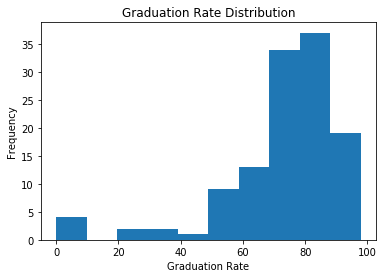

In [3]:
# distribution of target variable (graduation rate)

plt.hist(hs_data['Graduation_Rate_School'])
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.title('Graduation Rate Distribution')
plt.show()

In [4]:
hs_data.corr()


,School_ID,Student_Count_Total,Average_ACT_School,College_Enrollment_Rate_School,Graduation_Rate_School,Growth_ACT_Grade_11_Pct,Attainment_ACT_Grade_11_Pct,Freshmen_On_Track_School_Pct_Year_2,College_Persistence_School_Pct_Year_2,lib_cnt,...,Student_Attendance_Change,Teacher_Attendance_Change,One_Year_Dropout_Rate_Change,Student_Low_Income_Pct,Student_Special_Ed_Pct,Student_English_Learners_Pct,Student_Black_Pct,Student_Hispanic_Pct,Student_White_Pct,Student_Asian_Pct
School_ID,1.000000,0.153678,-0.095116,-0.416328,-0.142158,-0.475178,-0.117693,0.091754,-0.200508,-0.172828,...,-0.058069,0.920356,-0.177035,-0.081665,0.062997,0.128083,-0.149313,0.085580,0.202434,0.137021
Student_Count_Total,0.153678,1.000000,0.511578,0.382159,0.394248,0.258348,0.516508,0.197958,0.514897,-0.171297,...,-0.100226,0.160758,0.023408,-0.516919,-0.405661,-0.005903,-0.442892,0.257746,0.519923,0.451429
Average_ACT_School,-0.095116,0.511578,1.000000,0.681003,0.457470,0.764274,0.976073,0.441153,0.754701,-0.020359,...,-0.079097,-0.075312,-0.020547,-0.785647,-0.419518,-0.172616,-0.408583,0.163246,0.617799,0.536054
College_Enrollment_Rate_School,-0.416328,0.382159,0.681003,1.000000,0.645281,0.637397,0.685473,0.208039,0.663431,0.054676,...,-0.083962,-0.347688,0.028358,-0.494818,-0.593493,-0.350413,-0.084922,-0.042984,0.256177,0.289163
Graduation_Rate_School,-0.142158,0.394248,0.457470,0.645281,1.000000,0.341786,0.448929,0.289740,0.466795,-0.080754,...,-0.233488,-0.037076,0.071752,-0.270463,-0.607763,-0.082128,-0.287012,0.237639,0.130520,0.224593
Growth_ACT_Grade_11_Pct,-0.475178,0.258348,0.764274,0.637397,0.341786,1.000000,0.803953,0.352606,0.608334,-0.030195,...,0.000967,-0.443462,0.086543,-0.412136,-0.280891,-0.053897,-0.324475,0.229990,0.266589,0.273846
Attainment_ACT_Grade_11_Pct,-0.117693,0.516508,0.976073,0.685473,0.448929,0.803953,1.000000,0.423322,0.742825,-0.015421,...,-0.081823,-0.101359,-0.001925,-0.752198,-0.417196,-0.152597,-0.423779,0.201377,0.576561,0.499711
Freshmen_On_Track_School_Pct_Year_2,0.091754,0.197958,0.441153,0.208039,0.289740,0.352606,0.423322,1.000000,0.434973,-0.149321,...,-0.144223,0.100520,0.106979,-0.321223,-0.143629,-0.007321,-0.275010,0.201539,0.243015,0.169388
College_Persistence_School_Pct_Year_2,-0.200508,0.514897,0.754701,0.663431,0.466795,0.608334,0.742825,0.434973,1.000000,-0.174328,...,-0.063392,-0.195620,0.136326,-0.604900,-0.406162,-0.006750,-0.410136,0.244030,0.450014,0.409179
lib_cnt,-0.172828,-0.171297,-0.020359,0.054676,-0.080754,-0.030195,-0.015421,-0.149321,-0.174328,1.000000,...,0.165987,-0.202516,-0.196525,0.034608,0.022185,-0.119395,0.111447,-0.114240,-0.050870,0.022438


In [8]:
# Categorical Variables
hs_data.describe(exclude=[np.number]).T


,count,unique,top,freq
School_Type,121,10,Neighborhood,44
ADA_Accessible,121,3,Generally accessible,66
Dress_Code,121,2,Y,78
Bilingual_Services,121,3,Y,67
Refugee_Services,121,3,N,107
Title_1_Eligible,121,2,Y,111
Overall_Rating,121,6,Level 1+,31
Rating_Status,121,4,Good Standing,53
Student_Growth_Rating,121,6,BELOW AVERAGE,40
Student_Attainment_Rating,121,6,BELOW AVERAGE,64


### School Type

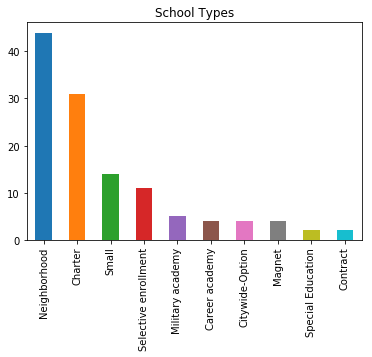

In [11]:
# distribution of school type
hs_data['School_Type'].value_counts().plot(kind='bar', title='School Types')

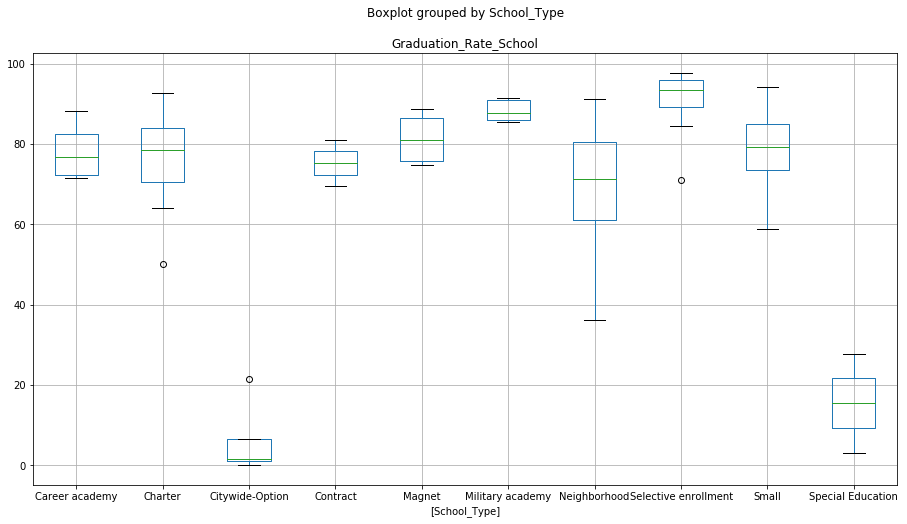

In [40]:
hs_data.boxplot(column=['Graduation_Rate_School'],by=['School_Type'], figsize=(15,8))

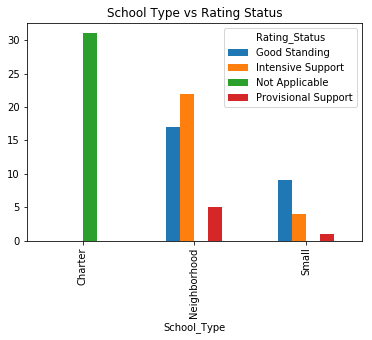

In [19]:
hs_ncs = hs_data[hs_data['School_Type'].isin(['Neighborhood', 'Charter', 'Small'])]
pd.crosstab(hs_ncs['School_Type'], hs_ncs['Rating_Status']).plot(kind='bar', title='School Type vs Rating Status')

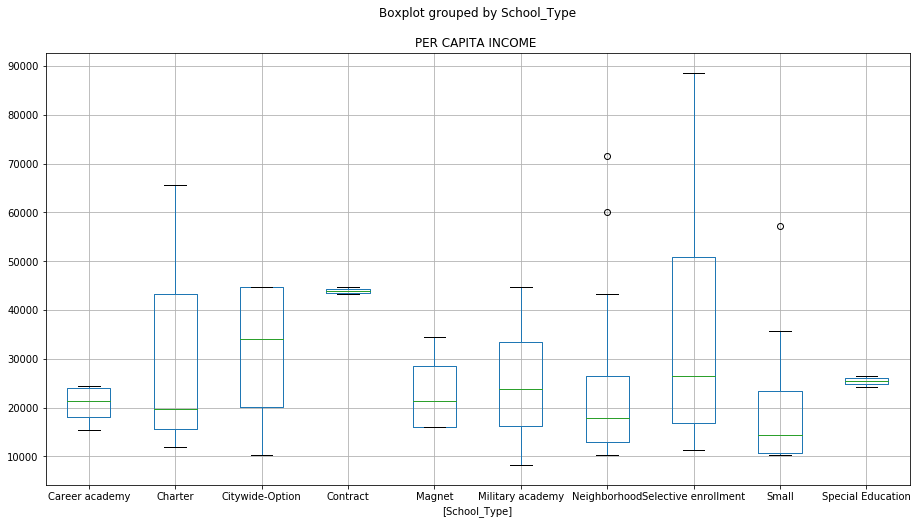

In [41]:
hs_data.boxplot(column=['PER CAPITA INCOME '],by=['School_Type'], figsize=(15,8))

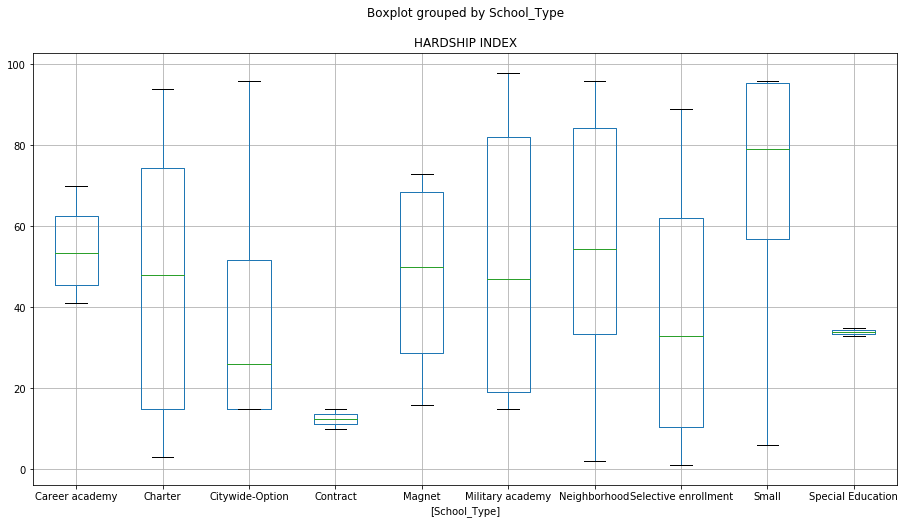

In [42]:
hs_data.boxplot(column=['HARDSHIP INDEX'],by=['School_Type'], figsize=(15,8))

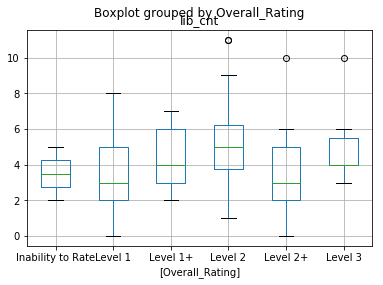

In [44]:
# Library count by overall rating

hs_data.boxplot(column=['lib_cnt'],by=['Overall_Rating'])

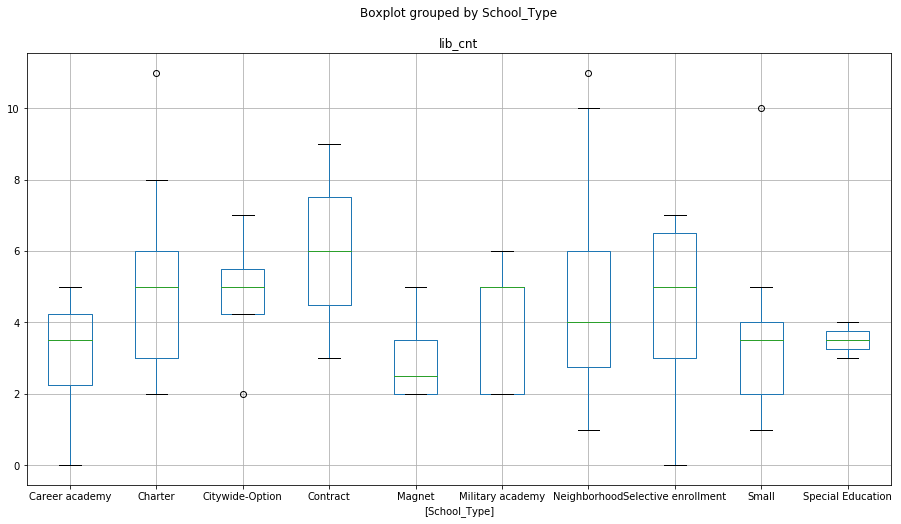

In [50]:
#Library count by school type
hs_data.boxplot(column=['lib_cnt'],by=['School_Type'], figsize=(15,8))

### Student Growth

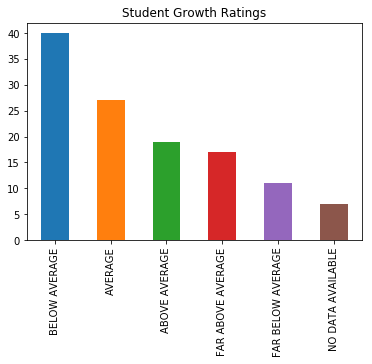

In [12]:
# distribution of student growth rating
hs_data['Student_Growth_Rating'].value_counts().plot(kind='bar', title='Student Growth Ratings')

### Overall Ratings

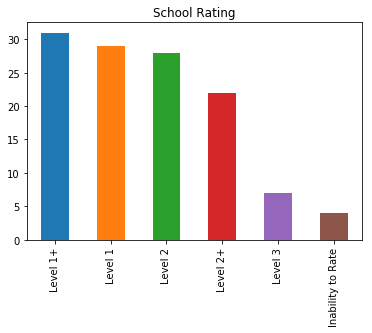

In [13]:
#distribution of overall rating
hs_data['Overall_Rating'].value_counts().plot(kind='bar', title='School Rating')

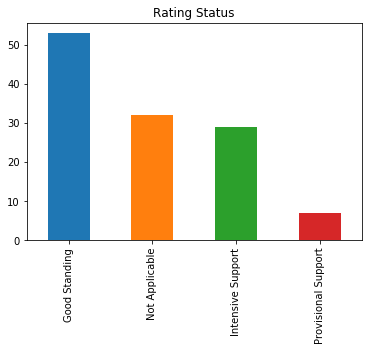

In [14]:
hs_data['Rating_Status'].value_counts().plot(kind='bar', title='Rating Status')

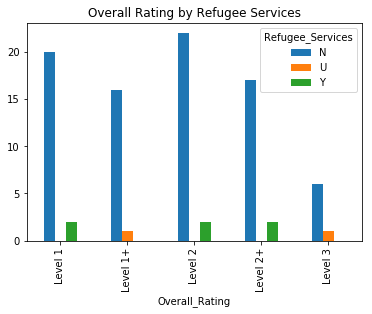

In [20]:
pd.crosstab(hs_data['Overall_Rating'], hs_ncs['Refugee_Services']).plot(kind='bar', title='Overall Rating by Refugee Services')

### Languages

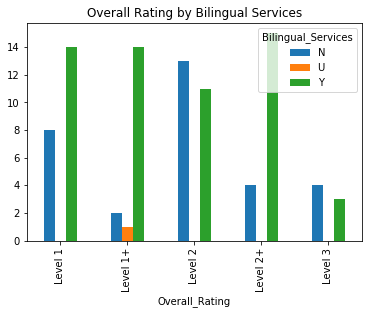

In [21]:
pd.crosstab(hs_data['Overall_Rating'], hs_ncs['Bilingual_Services']).plot(kind='bar', title='Overall Rating by Bilingual Services')

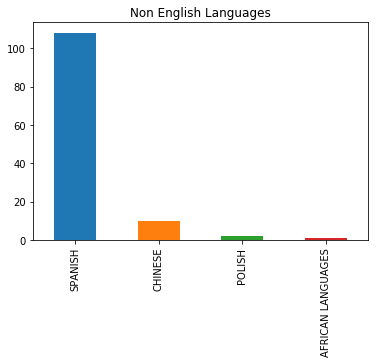

In [31]:
# distirubtion of overall language
hs_data['PRED_NON_ENG_LANG'].value_counts().plot(kind='bar', title='Non English Languages')

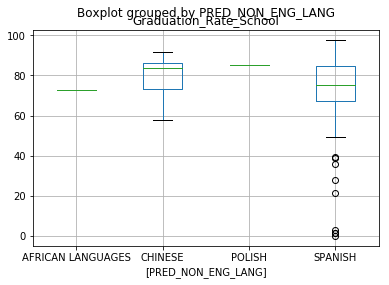

In [35]:
# Graduation rate by predominant languages

hs_data.boxplot(column=['Graduation_Rate_School'],by=['PRED_NON_ENG_LANG'])